### Facebook의 fasttext를 이용한 text classification

https://dacon.io/competitions/official/235670/codeshare/1840?page=undefined&dtype=recent&ptype=undefined

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 68 kB 2.7 MB/s 
  Using cached pybind11-2.10.0-py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3168423 sha256=80520410373b59b5d3062e1c0aca53e7ba2e659ada379127ca5e7a925d21a28a
  Stored in directory: /root/.cache/pip/wheels/4e/ca/bf/b020d2be95f7641801a6597a29c8f4f19e38f9c02a345bab9b
Successfully built fasttext


In [15]:
!apt-get update
!apt-get install g++ openjdk-8-jdk 
!pip3 install konlpy JPype1-py3
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://ppa.lau

In [11]:
import fasttext

# # Word Representation
# # Skipgram model :
# skip_model = fasttext.train_unsupervised('./author.txt', model='skipgram')
# skip_model.save_model("skip_model.bin")
# print(skip_model.words)
# # or, cbow model :
# cbow_model = fasttext.train_unsupervised('./author.txt', model='cbow')
# cbow_model.save_model("cbow_model.bin")
# print(cbow_model.words)

#  디폴트로 돌리면 0.56

import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
file = open('fasttexttrain.txt','w+')
for i in train.index:
  line = '__label__' + str(train['author'][i]) + ' ' + train['text'][i]
  file.write(line + "\n")

In [13]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test_x.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv', index_col=False)

In [ ]:
text_clf_model = fasttext.train_supervised('fasttexttrain.txt', epoch=30, minCount=2, maxn=10, verbose=0)

In [17]:
print(text_clf_model.words)
print(text_clf_model.labels)

['the', 'and', 'to', 'of', '</s>', 'a', 'I', 'in', 'was', 'that', 'he', 'his', 'you', 'with', 'had', 'it', 'odin', 'for', 'as', 'at', 'not', 'my', 'have', 'is', 'be', 'her', 'said', 'on', 'she', 'but', 'odin,', 'all', 'from', 'me', 'by', 'him', 'were', 'which', 'so', 'this', 'been', 'would', 'The', 'an', 'your', 'are', 'very', 'no', 'He', 'one', 'Mr.', 'could', 'what', 'we', 'they', 'will', 'if', 'or', 'upon', 'there', 'when', 'out', 'do', 'who', 'up', '“I', 'some', 'am', 'odin.', 'more', 'into', 'It', 'their', 'about', 'But', 'only', 'should', 'little', 'must', 'than', 'like', 'any', 'know', 'such', 'did', 'man', 'has', 'see', 'And', 'them', 'can', 'our', 'never', 'much', 'come', 'before', 'She', 'down', 'may', 'think', 'how', 'made', 'it,', 'time', 'me,', 'came', 'now', 'great', 'two', 'good', 'might', 'old', 'You', 'over', 'shall', 'after', 'own', 'cried', 'though', 'him,', 'go', 'it.', 'say', 'without', 'even', 'other', 'you,', 'looked', 'Mrs.', 'then', 'Miss', 'thought', 'every', 

In [14]:
result = text_clf_model.predict("He was almost choking. There was so much, so much he wanted to say, but strange exclamations were all that came from his lips. The Pole gazed fixedly at him, at the bundle of notes in his hand; looked at odin, and was in evident perplexity.", k=5)
print(result)

(('__label__3', '__label__0', '__label__2', '__label__1', '__label__4'), array([9.97219026e-01, 1.46374688e-03, 8.58613523e-04, 3.02757282e-04,
       2.05735487e-04]))


### [NLP 언제까지 미룰래? 일단 들어와!!] #2. NLP 전처리

https://dacon.io/competitions/official/235670/codeshare/1823?page=2&dtype=recent

### NLP Processing

1. 데이터를 불러온 후 각 신문기사들을 눈으로 확인하며 특수문자, 불용어 그리고 문장 구조에 대한 감을 잡습니다.

2. 문제의 목적과 분석자의 재량에 따라 불용어를 설정하고 리스트에 저장합니다. 이번 대회에서는 특수 문자와 조사만 제거해도 어느 정도 높은 정확도를 얻을 수 있습니다.

3. 불용어 이외의 특수 문자들을 제거합니다. 이번 대회를 위해 저는 정규표현식 패키지(re)를 사용하여 한글과 영어 소문자를 제외한 모든 글자들을 제거하였습니다.

4. 형태소 분석을 통해 문장을 형태소 단위의 토큰으로 분리합니다. 이때 내가 설정한 불용어들을 결과로 반환해주는 형태소 분석기를 사용하셔야 합니다. 예를 들어 조사를 불용어로 설정하였는데 조사를 분리해주지 못하는 형태소 분석기는 후보에서 제외하시면 됩니다.

5. 형태소 단위의 토큰들을 기반으로 리스트에 저장된 불용어를 제거합니다.


1. 형태소 분석 (Stemming)

- 단어나 문장의 언어적 속성을 파악하는 것

- 품사의 태깅(PoS)을 통해 이루어지며 한국어 형태소 분석을 위해 Konlpy 패키지에 있는 다양한 함수를 이용하여 진행 할 수 있음.

- 형태소 분석을 하는 이유는 주로 형태소 단위로 의미있는 단어를 가져가고 싶거나 품사 태깅을 통해 형용사나 명사를 추출하고 싶을 때 많이 이용

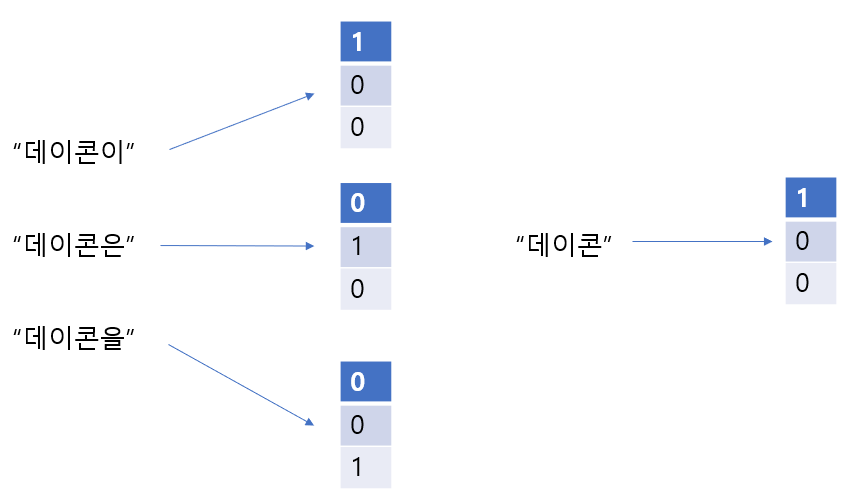

- 문장을 띄어쓰기 단위로 분류하여 vectorization을 하게 되면 "데이콘"이라는 같은 의미의 토큰 세개가 서로 다른 vector를 갖게 됨. 즉, 모델이 세 단어를 각각 다른 단어로 이해함. 하지만 형태소 분석을 통해 "데이콘"이라는 토큰을 추출한다면 앞의 세 단어는 동일한 vector를 갖게되며 모델이 해당 토큰을 더 잘 학습하는 데 도움이 됨.

- 형태소 분석은 어쩌면 모델링보다 성능에 더 중요한 영향을 미치는 아주 중요한 과정일 수 있음. 시간이 허락한다면 다양한 형태소 분석기를 사용하여 결과를 비교하는 것을 추천함.



### 1-1. Kkma()

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()
sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(kkma.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(kkma.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

### 1-2. Okt()

In [ ]:
from konlpy.tag import Okt
Okt = Okt()
sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Okt.morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Okt.nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Okt.pos(sentence))

### 1-3. Mecab ()

In [16]:
from konlpy.tag import Mecab
Mecab = Mecab()

sentence = '데이콘에서 다양한 컴피티션을 즐기면서 실력있는 데이터 분석가로 성장하세요!!.'

print("형태소 단위로 문장 분리")
print("----------------------")
print(Mecab .morphs(sentence))
print(" ")
print("문장에서 명사 추출")
print("----------------------")
print(Mecab .nouns(sentence))
print(" ")
print("품사 태킹(PoS)")
print("----------------------")
print(Mecab .pos(sentence))

형태소 단위로 문장 분리
----------------------
['데', '이콘', '에서', '다양', '한', '컴', '피티', '션', '을', '즐기', '면서', '실력', '있', '는', '데이터', '분석가', '로', '성장', '하', '세요', '!', '!.']
 
문장에서 명사 추출
----------------------
['이콘', '컴', '피티', '션', '실력', '데이터', '분석가', '성장']
 
품사 태킹(PoS)
----------------------
[('데', 'MAJ'), ('이콘', 'NNP'), ('에서', 'JKB'), ('다양', 'XR'), ('한', 'XSA+ETM'), ('컴', 'NNP'), ('피티', 'NNG'), ('션', 'NNG'), ('을', 'JKO'), ('즐기', 'VV'), ('면서', 'EC'), ('실력', 'NNG'), ('있', 'VV'), ('는', 'ETM'), ('데이터', 'NNG'), ('분석가', 'NNG'), ('로', 'JKB'), ('성장', 'NNG'), ('하', 'XSV'), ('세요', 'EP+EF'), ('!', 'SF'), ('!.', 'SY')]


이 외에도 Twitter, Komoran, Hannanum 등의 형태소 분석기(Pos Tagger)들이 존재합니다. 속도와 정확도 면에서 차이가 있으며 주로 Mecab 분석기를 이용함. 

- **Mecab:** 굉장히 속도가 빠르면서도 좋은 분석 결과를 보여줌.

- **Komoran**: 댓글과 같이 정제되지 않은 글에 대해서 먼저 사용해보면 좋음.(오탈자를 어느정도 고려해줌.)

- **Kkma**: 분석 시간이 오래걸리기 때문에 잘 이용하지 않게 됨.

- **Okt**: 품사 태깅 결과를 Noun, Verb등 알아보기 쉽게 반환해줌.

- **khaiii**: 카카오에서 가장 최근에 공개한 분석기, 성능이 좋다고 알려져 있으며 다양한 실험이 필요함.

## 2. 표제어 추출(Lemmatization)

- 언어학을 전공하지 않은 사람에게 Lemmatization과 stemming은 큰 차이가 없다고 생각함. 모두 단어의 본 모습을 찾아주는 과정으로서 Konlpy에서 공개한 형태소 분석기들을 이용하면 어느 정도 어간 추출이 가능함. 형태소 분석(Pos Tagging)을 stemming이라고 표기한 이유도 이와 같음.

In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

sentence = '성장했었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

In [ ]:
sentence = '성장하였었다.'

print("품사 태킹(PoS)")
print("----------------------")
print(kkma.pos(sentence))

## 3. 불용어 제거(Stopwords removing)

- 불용어: 문장에서 큰 의미가 없다고 생각되는 단어, 글자들

- 불용어는 데이터와 문제에 따라 유동적. 

ex) "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"

예시 문장에서 감성분석을 진행할 때는 "훌륭한"과 "아름다운"등이 주요 특징으로 사용될 것입니다. 하지만 경우에 따라서는 이러한 형용사들을 제외한 배우들의 연기력과 목소리라는 정보에 집중해야 할 때가 있습니다. 이럴때는 "훌륭한"과 "아름다운"은 불용어로 정의될 수 있음.

In [ ]:
import re
tokenizer = Okt()

def text_preprocessing(text, tokenizer):
    stopwords = ['을', '를', '이', '가', '은', '는']
    txt = re.sub('[^가-힣a-z','', text)
    token = tokenizer.morphs(txt)
    token = [t for t in token if t not in stopwords]

    return token

ex_text = "이번에 새롭게 개봉한 영화의 배우들은 모두 훌륭한 연기력과 아름다운 목소리를 갖고 있어!!"
example_pre= text_preprocessing(ex_text,tokenizer)

1.영어 소문자와 한글을 제외한 모든 문자를 제거

2.Okt를 이용해 형태소 분석

3.형태소 분석기를 거쳐 나온 결과들 중 stopwords 리스트에 포함되지 않는 토큰만 token이라는 리스트에 반환

## 4. 대회 적용

In [ ]:
def text_preprocessing(text_list):
    
    stopwords = ['을', '를', '이', '가', '은', '는', 'null'] #불용어 설정
    tokenizer = Okt() #형태소 분석기 
    token_list = []
    
    for text in text_list:
        txt = re.sub('[^가-힣a-z]', ' ', text) #한글과 영어 소문자만 남기고 다른 글자 모두 제거
        token = tokenizer.morphs(txt) #형태소 분석
        token = [t for t in token if t not in stopwords or type(t) != float] #형태소 분석 결과 중 stopwords에 해당하지 않는 것만 추출
        token_list.append(token)
        
    return token_list, tokenizer

#형태소 분석기를 따로 저장한 이유는 후에 test 데이터 전처리를 진행할 때 이용해야 되기 때문입니다. 
train['new_article'], okt = text_preprocessing(train['content']) 

## [NLP 언제까지 미룰래? 일단 들어와!!] #3. Vectorization

https://dacon.io/competitions/official/235670/codeshare/1841?page=2&dtype=recent

### Vectorization

- NLP를 컴퓨터가 이해할 수 있게 수치로 바꾸는 것

- 이 때 벡터로 변환된 고유의 토큰들이 모인 집합을 vocabulary 하며 vocabulary가 크면 클수록 학습이 오래 걸리게 됨. 

In [ ]:
from konlpy.tag import Okt
import re

Okt = Okt()

sentences = ['자연어 처리는 정말 정말 즐거워.', '즐거운 자연어 처리 다같이 해보자.']
tokens = []

for sentence in sentences:
    sentence = re.sub('[^가-힣a-z]', ' ', sentence) #간단한 전처리
    token = (Okt.morphs(sentence)) #형태소 분석기를 이용햔 토큰 나누기
    tokens.append(' '.join(token))

print("형태소 단위로 문장 분리")
print("----------------------")
print(tokens)

### 1. One Hot Encoding

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

t = Tokenizer()
t.fit_on_texts(tokens)
print("각 토큰에게 고유의 정수 부여")
print("----------------------")
print(t.word_index) 
print(" ")

s1=t.texts_to_sequences(tokens)[0] 
print("부여된 정수로 표시된 문장1")
print("----------------------")
print(s1)
print(" ")

s2=t.texts_to_sequences(tokens)[1]
print("부여된 정수로 표시된 문장2")
print("----------------------")
print(s2)
print(" ")

s1_one_hot = to_categorical(s1)
print("문장1의 one-hot-encoding")
print("----------------------")
print(s1_one_hot)
print(" ")

s2_one_hot = to_categorical(s2)
print("문장2의 one-hot-encoding")
print("----------------------")
print(s2_one_hot)

- 하지만 이 방식은 vocabulary 크기가 커짐에 따라 많은 공간을 차지하게 되고 벡터가 굉장히 sparse해지기 때문에 모델에게 좋은 특성을 알려주지 못하는 경우가 대부분

### 2.Count vectorization

- 이 방식은 vocabulary를 활용하여 각 문장이 갖고 있는 토큰의 count를 기반으로 문장을 vectorization 해줌.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(tokens) #여러 개의 문장을 넣어줘야 작동합니다!!

print(vectorizer.get_feature_names())
print(vectors.toarray())

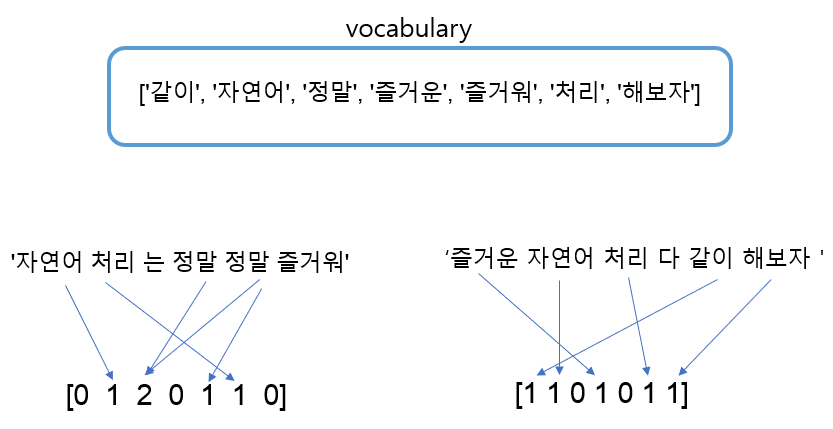

- 벡터화 결과 각 문장은 vocabulary의 인덱스를 기준으로 카운트가 정수로 표시된 것을 알 수 있음.

- 아쉬운 점은 sklearn의 CountVectorizer는 한 글자는 자동으로 제거함.

- 이 부분에서 형태소 분석기의 중요성에 대해서 알 수 있습니다. 즐거운과 즐거워는 같은 의미를 갖는 토큰이지만 okt는 이를 구분해주지 못해서 다른 토큰으로 분리가 되었음. 이는 모델에서 같은 의미의 토큰을 다르게 학습할 수 있음을 의미함.

### 3. TfIdf

1. 단어가 몇번 등장 했는지에 대한 정보


2. 어떤 단어가 언급된 문서의 수가 적다면 그 단어는 문서를 분류하는데 있어서 중요한 단어

즉 등장 횟수도 많고 문서 분별력 있는 단어들을 점수화하여 벡터화를 한 것이 TfIdf 기법

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=0)
tfidf_vectorizer = tfidf.fit_transform(tokens) 

#tf-idf dictionary    
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)
print(tfidf_vectorizer.toarray())

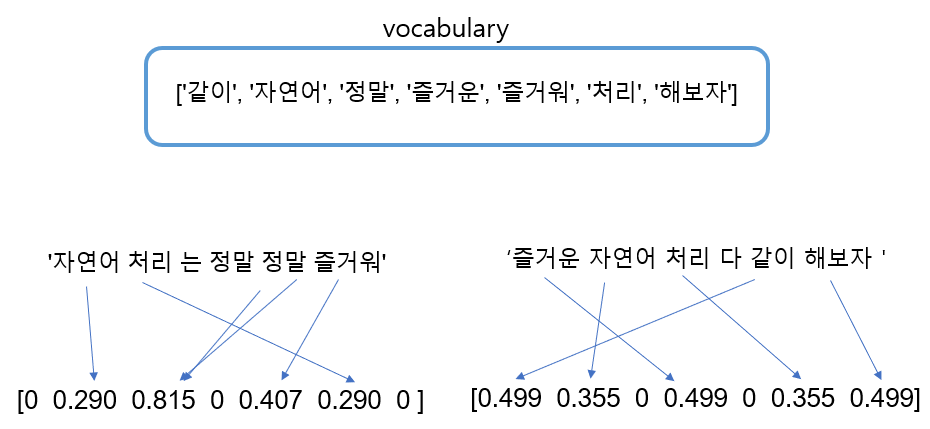

4. Padding

- 가변 길이의 입력을 받는 모형들이 존재하지만 아쉽게도 기본적으로는 문장의 길이를 동일하게 맞춰주어야 함. 문장의 길이를 맞춰주기 위해 부족한 길이만큼 0을 채워넣게 되는데 우리는 이것을 Padding라고 부름.

### 5. 대회 적용

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def text2sequence(train_text, max_len=100):
    
    tokenizer = Tokenizer() #keras의 vectorizing 함수 호출
    tokenizer.fit_on_texts(train_text) #train 문장에 fit
    train_X_seq = tokenizer.texts_to_sequences(train_text) #각 토큰들에 정수 부여
    vocab_size = len(tokenizer.word_index) + 1 #모델에 알려줄 vocabulary의 크기 계산
    print('vocab_size : ', vocab_size)
    X_train = pad_sequences(train_X_seq, maxlen = max_len) #설정한 문장의 최대 길이만큼 padding
    
    return X_train, vocab_size, tokenizer

train_X, vocab_size, vectorizer = text2sequence(train['text'], max_len = 100)